In [125]:
text  = "昨天讲谨慎追高，等大盘回调在介入，大盘昨天打了3135"

In [126]:
cut = jieba.cut(text)
cut

<generator object Tokenizer.cut at 0x7fc466f09350>

In [127]:
words = psg.cut(text)
for word, flag in words:
    print(word, flag)

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.628 seconds.
Prefix dict has been built successfully.


昨天 t
讲 v
谨慎 a
追高 v
， x
等 u
大盘 n
回调 v
在 p
介入 v
， x
大盘 n
昨天 t
打 v
了 ul
3135 m


In [2]:
import jieba.analyse
import matplotlib as mpl
import matplotlib.pyplot as plt


In [129]:
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator

In [130]:
content = open("../easymoney_data/001.tsv", encoding='UTF-8').read()

In [132]:
tags = jieba.analyse.extract_tags(content, topK=200, withWeight=False)

In [21]:
tags

['12',
 '01',
 '30',
 '03',
 '29',
 '28',
 '10',
 '14',
 '13',
 '股友',
 '09',
 '11',
 '15',
 '17',
 '20',
 '02',
 '2023',
 '16',
 '2022',
 '31',
 '21',
 '18',
 '22',
 '19',
 '08',
 '23',
 '今天',
 'A股',
 '07',
 '大盘',
 '00',
 '3000',
 '明天',
 '韭菜',
 '50',
 '06',
 '27',
 '58',
 'de',
 '26',
 '55',
 '04',
 '44',
 '34',
 '51',
 '47',
 '57',
 '48',
 '52',
 '40',
 '49',
 '45',
 '46',
 '36',
 '05',
 '56',
 '25',
 '54',
 '24',
 '37',
 '59',
 '3100',
 '35',
 '53',
 '33',
 '主力',
 '38',
 '42',
 '43',
 '39',
 '32',
 '指数',
 '股市',
 '41',
 '85',
 '个股',
 '基民',
 '炒股',
 '内资',
 '87',
 '84',
 '93',
 '收官',
 '90',
 '80',
 '91',
 '今年',
 '大笑',
 '89',
 '82',
 '一年',
 '86',
 '79',
 '88',
 '77',
 '78',
 '散户',
 '76',
 '大家',
 '74',
 '92',
 '83',
 '75',
 '81',
 '96',
 '99',
 '123',
 '98',
 '新年',
 '天天',
 '上证指数',
 '行情',
 '开门红',
 '牛市',
 '股票',
 '72',
 '100',
 '下跌',
 '最后',
 '北向',
 '70',
 '97',
 '就是',
 '复盘',
 'SH000001',
 '捂脸',
 '下午',
 '清仓',
 '一天',
 '110',
 '资金',
 '95',
 '104',
 '71',
 '94',
 '111',
 '市场',
 '73',
 '过年',
 '66'

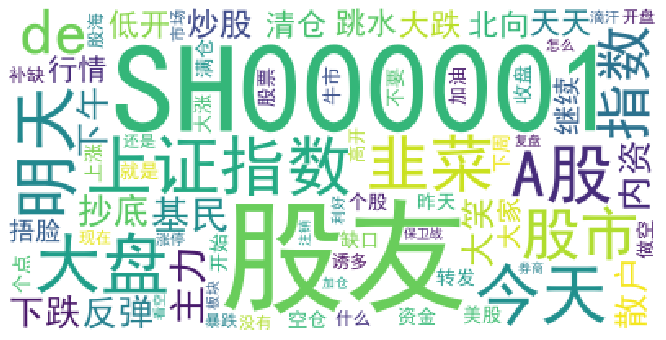

In [133]:
text = ' '.join(tags)
wc = WordCloud(font_path="/home/liubinxu/SimHei.ttf", background_color='white', max_words=100)
wc.generate(text)
plt.imshow(wc)
plt.axis("off")
plt.show()

In [6]:
import pandas as pd
from snownlp import SnowNLP
import seaborn as sns

In [29]:
SnowNLP("太糟糕").sentiments

0.19088842326013455

In [321]:
# easy_money = pd.read_table("../easymoney_data/001.clean2.tsv")
easy_money2 = pd.read_table("../easymoney_data/006.clean.tsv")

In [143]:
easy_money2 = easy_money2.rename(columns={"阅读": "read_num", "评论": "commit_num", "标题": "title", "最后更新": "date"})

In [3]:
def clean_tsv_stat(easy_money_file=None):
    easy_money = pd.read_table(easy_money_file)
    easy_money = easy_money.rename(columns={"阅读": "read_num", "评论": "commit_num", "标题": "title", "最后更新": "date"})
    easy_money["sentiments"] = easy_money["title"].map(lambda x: SnowNLP(str(x)).sentiments)
    easy_money.to_csv(easy_money_file+".senti.tsv", sep="\t")
    sentiment_stat(easy_money, easy_money_file+".senti.stat.tsv")
    

In [299]:
easy_money5 = pd.read_table("../easymoney_data/005.clean.tsv")
easy_money5 = easy_money5.rename(columns={"阅读": "read_num", "评论": "commit_num", "标题": "title", "最后更新": "date"})
easy_money5["sentiments"] = easy_money5["title"].map(lambda x: SnowNLP(str(x)).sentiments)
easy_money5.to_csv("005.senti.tsv", sep="\t")

In [4]:
def sentiment_stat(sentiment_df, out_table_name = "sens_stat.tsv"):
    sentiment_df["date"] = sentiment_df["date"].map(lambda x: str(x).split(" ")[0])
    nums = sentiment_df["sentiments"].groupby(sentiment_df["date"]).count()
    sums = sentiment_df["sentiments"].groupby(sentiment_df["date"]).sum()                                                                     
    day_senti = pd.DataFrame()   
    day_senti["num"] = nums
    day_senti["sum"] = sums
    day_senti["senti_value"] = sums/nums
    day_senti.to_csv(out_table_name)                                           

In [300]:
sentiment_stat(easy_money5, "easy_money5_stat.csv")

In [8]:
clean_tsv_stat(easy_money_file = "../easymoney_data/007.clean.tsv")

In [144]:
easy_money2["sentiments"] = easy_money2["title"].map(lambda x: SnowNLP(x).sentiments)

In [70]:
easy_money

,read_num,commit_num,title,作者,date,sentiments
0,155,0,置顶 开盘前瞻：数字经济助力指数反弹，成交额够不够？,财富视点直播,01-03 16:27,0.996455
1,14313,546,12月30日午盘建仓记录,股市强心针,01-04 08:39,0.056906
2,19627,207,惯性上冲后回落震荡,狐光侠影,01-04 08:39,0.199920
3,1,0,希望今天在券商和新能源、数字经济的协力下，一举拿下,三个为什么,01-04 08:38,0.277987
4,19.0万,2201,后市两种走法一个结局,神剑SUN,01-04 08:38,0.996779
...,...,...,...,...,...,...
797116,113,0,缩量命小阳，逢高坚决减仓。明天可能没有机会了！,朋友weghakjnb,01-26 14:27,0.980662
797117,172,1,这是金针探底吗？,生财满腹得嬴政,01-26 14:26,0.473767
797118,367,11,美股都是绿的，大A能保持红盘很不容易，大家不信谣不,空仓看牛市,01-26 14:26,0.298125
797119,115,0,看看沪指年线的MACD，有什么感想吗？,年年四海地柳栖梧,01-26 14:26,0.718199


In [71]:
easy_money.to_csv("001.senti.tsv", sep="\t")

In [41]:
easy_money.date[0]

'01-03 21:03'

In [145]:
easy_money2.to_csv("002.senti.tsv", sep="\t")

In [147]:
easy_money2["date"] = easy_money2["date"].map(lambda x: x.split(" ")[0])

In [148]:
nums = easy_money2["sentiments"].groupby(easy_money2["date"]).count()
sums = easy_money2["sentiments"].groupby(easy_money2["date"]).sum()

In [149]:
day_senti = pd.DataFrame()

In [150]:
day_senti["num"] = nums
day_senti["sum"] = sums
day_senti["senti_value"] = sums/nums

In [151]:
day_senti

,num,sum,senti_value
date,,,
01-01,275,162.637406,0.591409
01-02,294,152.209039,0.517718
01-03,1563,803.017824,0.513767
01-04,1664,856.127005,0.514499
01-05,1943,1006.883002,0.518211
01-06,1859,943.265031,0.507405
01-07,209,119.184484,0.570261
01-08,73,44.595954,0.610903
01-09,1792,926.986091,0.517291


In [152]:
day_senti.to_csv("2022_easy_money_sens")

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import akshare as ak
import datetime

In [13]:
sh_pd = ak.stock_zh_index_daily(symbol="sh000001")
sh_pd2 = ak.stock_zh_index_daily(symbol="sh000852")

In [23]:
datetime.datetime(sh_pd["date"][0].year, sh_pd["date"][0].month, sh_pd["date"][0].day)

datetime.datetime(1990, 12, 19, 0, 0)

In [25]:
sh_pd["date"] = sh_pd["date"].map(lambda x: datetime.datetime(x.year, x.month, x.day))
sh_pd2["date"] = sh_pd2["date"].map(lambda x: datetime.datetime(x.year, x.month, x.day))

In [26]:
sens = pd.read_table("2022_easy_money_sens.csv", sep=",", header=0, parse_dates=["date"])

In [237]:
sens["date"][0]
# sh_pd["date"][0]

Timestamp('2022-01-26 00:00:00')

In [180]:
datetime(2022, 1, 2)

datetime.datetime(2022, 1, 2, 0, 0)

In [28]:
from datetime import datetime

In [29]:
sens["date"] = sens['date'].apply(lambda x: x.to_pydatetime())
sens["date2"] = sens['date'].map(lambda x: datetime(x.year, x.month, x.day))

In [304]:
sens["date2"]

0     2022-01-26
1     2022-01-27
2     2022-01-28
3     2022-01-29
4     2022-01-30
         ...    
385   2023-02-15
386   2023-02-16
387   2023-02-17
388   2023-02-18
389   2023-02-19
Name: date2, Length: 390, dtype: datetime64[ns]

In [30]:
sh_pd = sh_pd[sh_pd["date"].map(str) >= "2022-01-26"]

In [308]:
sh_pd

,date,open,high,low,close,volume
7602,2022-01-26,3442.692,3462.123,3417.759,3455.668,27512282800
7603,2022-01-27,3456.102,3456.363,3392.015,3394.247,28060653400
7604,2022-01-28,3407.593,3417.045,3356.556,3361.440,29085525700
7605,2022-02-07,3407.762,3434.026,3407.762,3429.581,32048521100
7606,2022-02-08,3428.542,3453.186,3390.458,3452.629,36609386500
...,...,...,...,...,...,...
7852,2023-02-13,3256.988,3285.091,3252.633,3284.160,29721318800
7853,2023-02-14,3288.974,3293.734,3279.189,3293.283,27097416800
7854,2023-02-15,3294.015,3296.200,3274.551,3280.492,26993912300
7855,2023-02-16,3281.735,3308.828,3231.342,3249.030,38086354500


In [34]:
sh_pd2

,date,open,high,low,close,volume
0,2014-10-17,6118.979,6140.119,5943.592,6058.668,9712586400
1,2014-10-20,6068.776,6154.685,6068.517,6154.520,7902498400
2,2014-10-21,6153.020,6176.069,6097.366,6103.008,7954840800
3,2014-10-22,6102.464,6131.886,6024.404,6027.510,7355880000
4,2014-10-23,6009.840,6032.613,5899.890,5930.483,7429696000
...,...,...,...,...,...,...
2050,2023-03-20,6745.952,6760.910,6694.522,6721.455,17531344100
2051,2023-03-21,6726.798,6810.288,6725.835,6809.391,14658493500
2052,2023-03-22,6830.194,6845.761,6810.765,6840.326,16031826700
2053,2023-03-23,6827.676,6869.176,6809.851,6868.835,16544805600


In [35]:
df = pd.merge(left=sh_pd2[["date", "close", "volume"]],
             right=sens[["date", "num", "sum", "senti_value"]],
             left_on=["date"], right_on=["date"])


In [36]:
df["volume_5_mean"] =  df["volume"].rolling(3, min_periods=1).mean() /40000000000

In [314]:
df

,date,close,volume,num,sum,senti_value,volume_5_mean
0,2022-01-26,3455.668,27512282800,893,447.867620,0.501531,0.687807
1,2022-01-27,3394.247,28060653400,7388,3637.268424,0.492321,0.694662
2,2022-01-28,3361.440,29085525700,6420,3193.611439,0.497447,0.705487
3,2022-02-07,3429.581,32048521100,2672,1329.433167,0.497542,0.743289
4,2022-02-08,3452.629,36609386500,2685,1401.457233,0.521958,0.814529
...,...,...,...,...,...,...,...
250,2023-02-13,3284.160,29721318800,1171,619.885528,0.529364,0.677162
251,2023-02-14,3293.283,27097416800,1591,795.945405,0.500280,0.690679
252,2023-02-15,3280.492,26993912300,1590,797.170719,0.501365,0.698439
253,2023-02-16,3249.030,38086354500,6050,2955.616225,0.488532,0.768147


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version

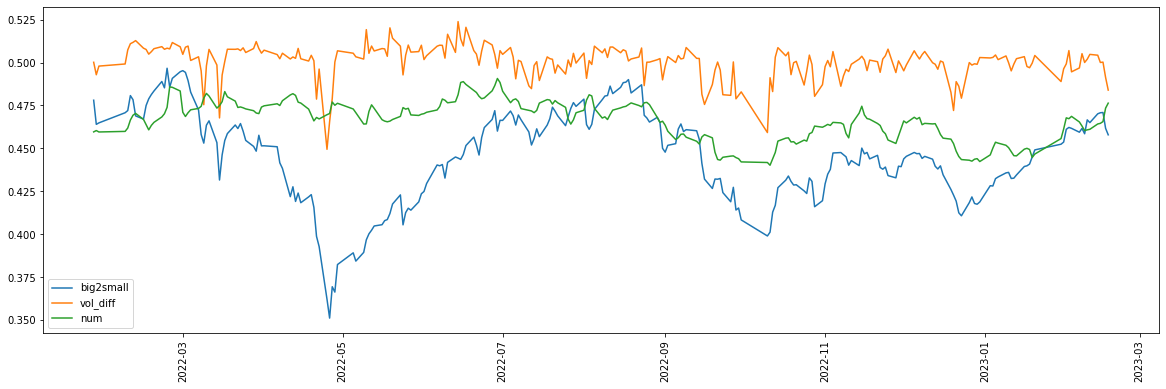

In [40]:
a = 0.5
plt.rcParams["figure.figsize"] = (20,6)
df22 = df[:]
import matplotlib.ticker as ticker
fig, ax = plt.subplots(1,1)

ax.plot(df22["date"], df22["close"]/15000, label=2) 
# ax.plot(df22["date"], df22["senti_value"] , label=2)
ax.plot(df22["date"], (df22["num"]/8000 ) *( df22["senti_value"] - a) + 0.5 , label=2)
ax.plot(df22["date"], df22["volume_5_mean"]/6 + 0.4  , label=2)
# ax.plot(df22["datetime"], df22["small_vol_m"].rolling(12, min_periods=1).mean(), label=2)
# 
# ax.plot(df22["datetime"], df22["big_close"]  , label=1)

ax.legend(["big2small", "vol_diff", "num"])
plt.xticks(rotation=90)
plt.show()




NameError: name 'df22' is not defined

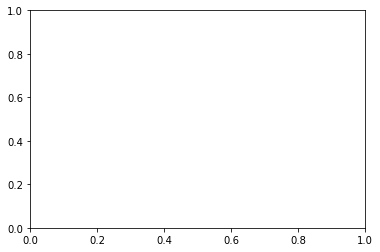

In [9]:
fig2, ax2 = plt.subplots(1,1)
ax2.plot(df22["date"], (df22["num"]/7000 ) *( df22["senti_value"] - a) + 0.9, label=2)
ax2.plot(df22["date"], df22["close"]/4000, label=2) 
ax2.axhline(0.9, color="black")
ax2.axhline(0.91, color="black")


In [275]:
df_test = df
df_test["close_change"] = df["close"].pct_change()
df_test["volume_change"] = df["volume"].pct_change()
df_test["senti_change"] = df["senti_value"].pct_change()
df_test["close_change_m"] = df["close_change"].rolling(5, min_periods=1).mean()
df_test["volume_change_m"] = df["volume_change"].rolling(5, min_periods=1).mean()
df_test["senti_change_m"] = df["senti_change"].rolling(5, min_periods=1).mean()

In [276]:
df_test

,date,close,volume,num,sum,senti_value,volume_5_mean,close_change,volume_change,close_change_m,volume_change_m,senti_change,senti_change_m
0,2022-01-26,3455.668,27512282800,893,447.867620,0.501531,0.687807,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-27,3394.247,28060653400,7388,3637.268424,0.492321,0.694662,-0.017774,0.019932,-0.017774,0.019932,-0.018364,-0.018364
2,2022-01-28,3361.440,29085525700,6420,3193.611439,0.497447,0.705487,-0.009665,0.036523,-0.013720,0.028228,0.010412,-0.003976
3,2022-02-07,3429.581,32048521100,2672,1329.433167,0.497542,0.743289,0.020271,0.101872,-0.002389,0.052776,0.000191,-0.002587
4,2022-02-08,3452.629,36609386500,2685,1401.457233,0.521958,0.814529,0.006720,0.142311,-0.000112,0.075160,0.049073,0.010328
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,2023-02-06,3238.698,26705310700,2501,1225.501019,0.490004,0.744841,-0.007571,-0.089621,-0.001862,-0.049428,0.000510,0.004905
246,2023-02-07,3248.094,25094645000,1705,894.005651,0.524343,0.676119,0.002901,-0.060313,-0.000447,-0.031398,0.070079,0.015567
247,2023-02-08,3232.106,23453048100,2785,1393.032345,0.500191,0.627108,-0.004922,-0.065416,-0.003228,-0.070698,-0.046062,0.002633
248,2023-02-09,3270.383,25475452900,2200,1115.858497,0.507208,0.616860,0.011843,0.086232,-0.000905,-0.049860,0.014029,-0.005349


In [256]:
df_test["close_change"].corr(df_test["volume_change"])

-0.004684759546932058

In [264]:
df_test["close_change"].shift()

0           NaN
1           NaN
2     -0.017774
3     -0.009665
4      0.020271
         ...   
245   -0.006776
246   -0.007571
247    0.002901
248   -0.004922
249    0.011843
Name: close_change, Length: 250, dtype: float64

In [286]:
shift_corr = []
shift_corr2 = []
shift_corr3 = []
shift_corr4 = []
for s in range(0, 20):
    sc = df_test["close_change"].corr(df_test["volume_change"].shift(s))
    sc_m = df_test["close_change_m"].corr(df_test["volume_change_m"].shift(s))
    shift_corr.append(sc)
    shift_corr2.append(sc_m)
    s3c = df_test["close_change"].corr(df_test["senti_change"].shift(s))
    s4c_m = df_test["close_change_m"].corr(df_test["senti_change_m"].shift(s))
    shift_corr3.append(s3c)
    shift_corr4.append(s4c_m)



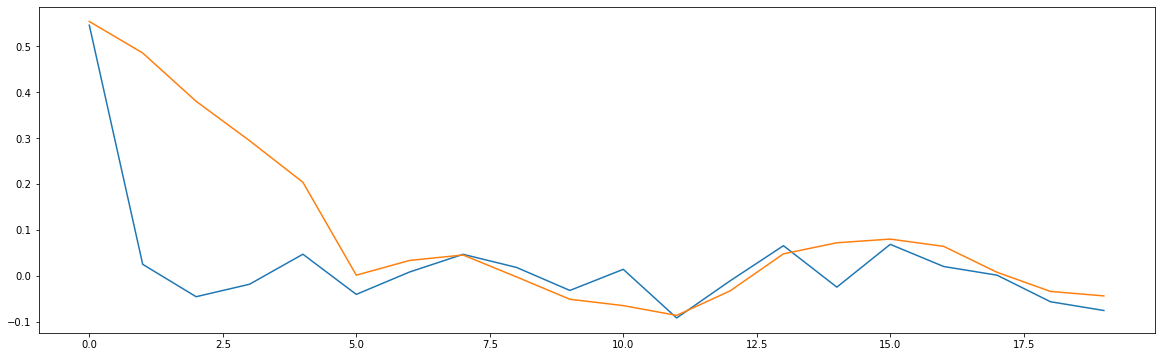

In [287]:
fig, ax = plt.subplots(1,1)

ax.plot(range(0, 20), shift_corr3) 
ax.plot(range(0, 20), shift_corr4) 

In [298]:
shift_corr = []
shift_corr2 = []
shift_corr3 = []
shift_corr4 = []
for s in range(0, 20):
    s3c = df_test["close_change"].corr((df_test["senti_change"]-df_test["close_change"]).shift(s))
    print(s3c)
 

0.711683287626873
0.02387493559957194
-0.0471017635283899
-0.028886562126130593
0.03258999936814946
-0.03333538669328508
0.008833134991506739
0.03852777654015575
0.03180561458002869
-0.04047347412172495
0.01059866093491441
-0.09865974434011722
0.006690695768396944
0.047533763488027396
-0.03333756589030397
0.06625851015263602
0.004606338014738109
0.019189550215207907
-0.046196947205738394
-0.0801552261098984
